We will implement Multi-class classification using logistic regression on the Iris dataset. To simplify the model, we only use the first two features of the Iris dataset. We will make two models, one without regularisation and one with regularisation, and then compare the result. 

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

Load the Iris data from scikit learn and divide the data into two parts: training and test data with ratio 80:20.

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
X = np.array([[1, x[0], x[1]] for x in X])  # add 1 for bias
y = iris.target
target = iris.target_names
print(X.shape)
print(y.shape)
target_names = iris.target_names
print(target_names)

(150, 3)
(150,)
['setosa' 'versicolor' 'virginica']


In [ ]:
#zip into (1, x1, x2, y)
data = [list(i) for i in zip(X[:,0], X[:,1], X[:,2], y)]
data = np.array(data)
#shuffle data to balance distribution
np.random.shuffle(data)

#Split data into train and test with default 80:20 ratio
def split(data, train_size = 0.8):
  train_length = int(train_size * len(data))
  X_train = data[:train_length, 0:3]
  X_test  = data[train_length:, 0:3]
  y_train = data[:train_length, 3]
  y_test  = data[train_length:, 3]
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(data)
y_train_setosa = [label == 0 for label in y_train]
y_train_versicolor = [label == 1 for label in y_train]
y_train_virginica = [label == 2 for label in y_train]

print('Number of training data:', len(X_train))
print('Number of test data:', len(X_test))
print('y_train: ', y_train)
print('y_test:', y_test)

Number of training data: 120
Number of test data: 30
y_train:  [2. 1. 2. 0. 2. 2. 2. 2. 0. 2. 1. 1. 1. 1. 0. 1. 1. 2. 0. 2. 0. 1. 2. 1.
 1. 0. 1. 0. 0. 1. 0. 2. 0. 2. 2. 2. 2. 1. 0. 2. 1. 1. 1. 0. 2. 1. 0. 2.
 2. 1. 0. 2. 1. 2. 0. 2. 1. 0. 0. 2. 0. 2. 0. 0. 2. 2. 2. 1. 1. 1. 0. 2.
 0. 1. 0. 2. 0. 1. 1. 0. 0. 0. 1. 2. 0. 0. 0. 1. 1. 1. 1. 0. 0. 2. 0. 2.
 0. 0. 0. 0. 1. 0. 2. 0. 1. 2. 2. 2. 2. 1. 2. 1. 0. 1. 2. 1. 2. 0. 1. 1.]
y_test: [0. 1. 0. 2. 2. 2. 1. 2. 2. 0. 0. 2. 1. 1. 0. 0. 1. 1. 1. 2. 1. 0. 2. 1.
 2. 1. 1. 2. 0. 0.]


Using scatter plot (matplotlib), visualise the Iris data (training part only)

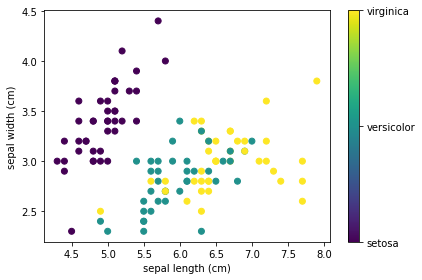

In [ ]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(X_train[:,1], X_train[:,2], c=y_train)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

From visualisation above we can see that setosa have distinct area while the other two class have large overlapping area.

Define sigmoid function

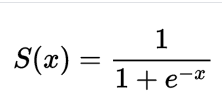

In [ ]:
def sigmoid(z):
  # convert input to a numpy array
  z = np.array(z)
    
  # prepare variable g to store the value of sigmoid function of z
  g = np.zeros(z.shape)
    
  # sigmoid function
  g = 1 / (1 + np.exp(-z))
  return g

Define a Hypothesis function

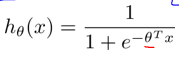



In [ ]:
def hypothesis(theta, x):
  return sigmoid(np.dot(theta, x.T)[0])

#test
theta = np.zeros((1, 3))
print(hypothesis(theta, X_train[0]))

0.5


Define cost function

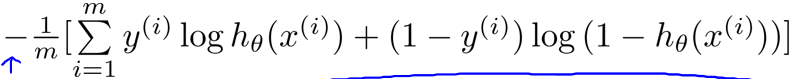

In [ ]:
def cost_function(x, y, theta):
  m = len(x)
  total_cost = 0
  for i in range(len(x)):
    total_cost += y[i]*np.log(hypothesis(theta, x[i])) + (1 - y[i])*np.log(1 - hypothesis(theta, x[i]))
  return -total_cost/m

#test
print(cost_function(X_train, y_train_setosa, np.zeros((1, 3))))

0.6931471805599461


Define cost function with regularisation


In [ ]:
def cost_function_regularised(x, y, theta, Lambda):
  m = len(x)
  total_cost = 0
  for i in range(len(x)):
    total_cost += -(y[i]*np.log(hypothesis(theta, x[i])) + (1 - y[i])*np.log(1 - hypothesis(theta, x[i]))) + Lambda*np.sum(theta[1:]**2) 
  return total_cost/m

Define gradient descent function

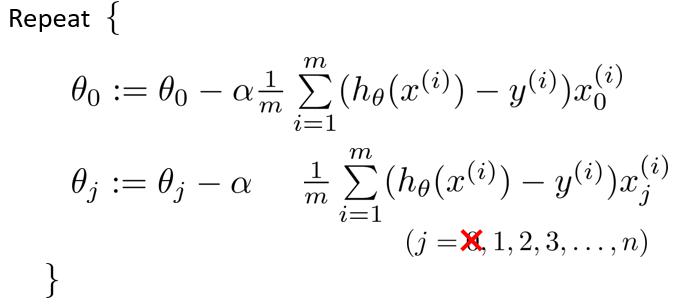

Define cost function derivative

In [ ]:
def cost_function_gradient(x, y, theta, thetaj):
  m = len(x)
  total_cost = 0
  for i in range(len(x)):
    total_cost += (hypothesis(theta, x[i]) - y[i]) * x[i][thetaj]
  return total_cost/m

def cost_function_regularised_gradient(x, y, theta, thetaj, Lambda):
  m = len(x)
  total_cost = 0
  for i in range(len(x)):
    total_cost += (hypothesis(theta, x[i]) - y[i]) * x[i][thetaj]
    if thetaj > 0:
      total_cost += 2 * Lambda * theta[0][thetaj]
  return total_cost/m

#test
print(cost_function_gradient(X_train, y_train_setosa, np.zeros((1,3)), 0))

0.15833333333333333


Define gradient descent algorithm

In [ ]:
def train(x, y, learning_rate, iteration):
  theta = np.zeros((1, 3))
  cost  = []
  #weight update
  for i in range(iteration):
    theta0_diff = learning_rate * cost_function_gradient(x, y, theta, 0)
    theta1_diff = learning_rate * cost_function_gradient(x, y, theta, 1)
    theta2_diff = learning_rate * cost_function_gradient(x, y, theta, 2)
    theta -= [[theta0_diff, theta1_diff, theta2_diff]]
    cost.append(cost_function(x, y, theta))
  return theta, cost

def train_regularised(x, y, learning_rate, iteration, Lambda):
  theta = np.zeros((1, 3))
  cost  = []
  #weight update
  for i in range(iteration):
    theta0_diff = learning_rate * cost_function_regularised_gradient(x, y, theta, 0, Lambda)
    theta1_diff = learning_rate * cost_function_regularised_gradient(x, y, theta, 1, Lambda)
    theta2_diff = learning_rate * cost_function_regularised_gradient(x, y, theta, 2, Lambda)
    theta -= [[theta0_diff, theta1_diff, theta2_diff]]
    cost.append(cost_function_regularised(x, y, theta, Lambda))
  return theta, cost

Traning 

In [ ]:
#Hyperparameter setting
lr = 0.15
iteration = 200
Lambda = 0.1

#Training
setosa_theta, setosa_cost = train(X_train, y_train_setosa, lr, iteration)
versicolor_theta, versicolor_cost = train(X_train, y_train_versicolor, lr, iteration)
virginica_theta, virginica_cost = train(X_train, y_train_virginica, lr, iteration)

#regularised version
reg_setosa_theta, reg_setosa_cost = train_regularised(X_train, y_train_setosa, lr, iteration, Lambda)
reg_versicolor_theta, reg_versicolor_cost = train_regularised(X_train, y_train_versicolor, lr, iteration, Lambda)
reg_virginica_theta, reg_virginica_cost = train_regularised(X_train, y_train_virginica, lr, iteration, Lambda)

Plot the cost function

In [ ]:
def plot_cost(title, cost, reg_cost):
  plt.title(title)
  plt.xlabel('Iteration')
  plt.ylabel('Cost')
  x = np.arange(1, len(cost)+1)
  plt.plot(x, cost, c='b', label='Unregularised')
  plt.plot(x, reg_cost, c='r', label='Regularised')

  plt.legend()
  plt.tight_layout()
  plt.show()  

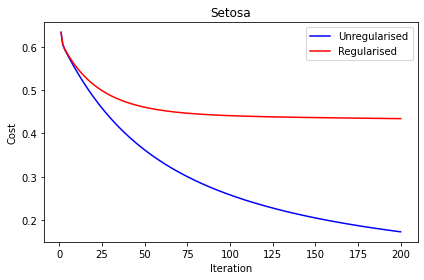

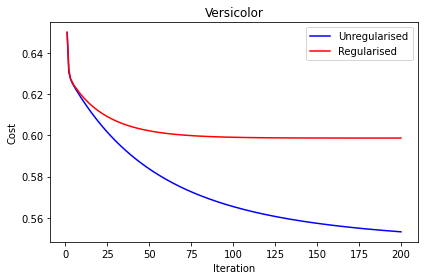

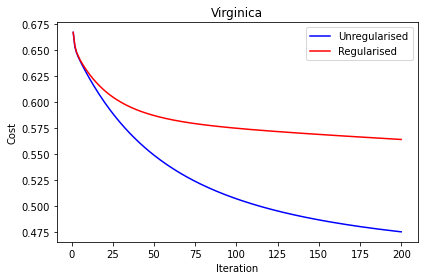

In [ ]:
plot_cost('Setosa', setosa_cost, reg_setosa_cost)
plot_cost('Versicolor', versicolor_cost, reg_versicolor_cost)
plot_cost('Virginica', virginica_cost, reg_virginica_cost)

Final theta and cost value for each class

In [ ]:
print('Setosa:\n' + 'theta\t\t\t=', setosa_theta[0], '\ncost\t\t\t=', setosa_cost[-1])
print('regularized_theta\t=', reg_setosa_theta[0], '\nregularized_cost\t=', reg_setosa_cost[-1], '\n')
print('Versicolor:\n' + 'theta\t\t\t=', versicolor_theta[0], '\ncost\t\t\t=', versicolor_cost[-1])
print('regularized_theta\t=', reg_versicolor_theta[0], '\nregularized_cost\t=', reg_versicolor_cost[-1], '\n')
print('Virginica:\n' + 'theta\t\t\t=', virginica_theta[0], '\ncost\t\t\t=', virginica_cost[-1])
print('regularized_theta\t=', reg_virginica_theta[0], '\nregularized_cost\t=', reg_virginica_cost[-1])

Setosa:
theta			= [ 0.34750101 -1.43226374  2.26348521] 
cost			= 0.21939873161755258
regularized_theta	= [ 0.37201148 -0.55279344  0.67105424] 
regularized_cost	= 0.4378370793000334 

Versicolor:
theta			= [ 0.05054795  0.40824665 -1.05946038] 
cost			= 0.5594603972951285
regularized_theta	= [-0.06186259  0.08302362 -0.37462898] 
regularized_cost	= 0.5988155294598899 

Virginica:
theta			= [-0.51626652  0.73684481 -1.468486  ] 
cost			= 0.49211318795795056
regularized_theta	= [-0.61287537  0.25088727 -0.4671468 ] 
regularized_cost	= 0.5707454189847653


Define function to plot decision boundaries

In [ ]:
def plot_decision(title, x, y, theta):

  # Calculate the intercept and gradient of the decision boundary.
  bias = theta[0][0]
  w1   = theta[0][1]
  w2   = theta[0][2]
  c    = -bias/w2
  m    = -w1/w2

  # this formatter will label the colorbar with the correct target names
  formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
  
  #plot the line
  plt.title(title)
  plt.scatter(x[:,1], x[:,2], c=y)
  plt.colorbar(ticks=[0, 1, 2], format=formatter)
  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])
  x_min = np.min(x[:, 1])
  x_max = np.max(x[:, 1])
  xd = np.arange(x_min, x_max)
  yd = m*xd + c 
  plt.plot(xd, yd, 'b')

  plt.tight_layout()
  plt.show()

Plot decision boundary for setosa

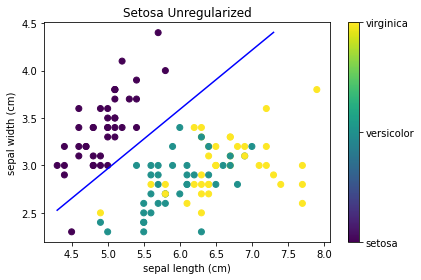

In [ ]:
plot_decision('Setosa Unregularized', X_train, y_train, setosa_theta)

Define function to predict new data with trained model

In [ ]:
def predict(setosa_theta, versicolor_theta, virginica_theta, new_data):
  predicted_class = np.argmax([hypothesis(setosa_theta, new_data), hypothesis(versicolor_theta, new_data), hypothesis(virginica_theta, new_data)])
  prob = np.max([hypothesis(setosa_theta, new_data), hypothesis(versicolor_theta, new_data), hypothesis(virginica_theta, new_data)])

  print('Predicted class: ', target_names[predicted_class])
  print('With {0:.2f}% probability'.format(prob*100))

#test with new data
sepal_width, sepal_length = 4.5, 5.5
new_data = np.array([1, sepal_width, sepal_length]) #add 1 for bias

#predict with unregularised model
predict(setosa_theta, versicolor_theta, virginica_theta, new_data)

Predicted class:  setosa
With 99.83% probability


Evaluate model accuracy

In [ ]:
def evaluate(x, y, setosa_theta, versicolor_theta, virginica_theta):
  correct = 0
  for i in range(len(X_test)):
    predicted_class = np.argmax([hypothesis(setosa_theta, x[i]), hypothesis(versicolor_theta, x[i]), hypothesis(virginica_theta, x[i])])
    if y[i] == predicted_class:
      correct += 1
  return correct/len(y_test)

#unregularised accuracy
print('Unregularised accuracy {0:.2f}%'.format(evaluate(X_test, y_test, setosa_theta, versicolor_theta, virginica_theta)*100))

#regularised accuracy
print('\nRegularised accuracy {0:.2f}%'.format(evaluate(X_test, y_test, reg_setosa_theta, reg_versicolor_theta, reg_virginica_theta)*100))

Unregularised accuracy 70.00%

Regularised accuracy 63.33%


# Conclusion

We got not bad accuracy considering we only use the first two features. On setosa we have fast convergence due to the distinct area that they have, on the other two classes, they have a large overlapping area that may cause slower convergence and get stuck on 0.4-0.5 cost, as expected from our earlier analysis. To increase accuracy we need to use more features and apply dimensionality reduction instead of reducing the features.



The regularisation that we used punishes theta that deviates far from zero, thus the regularised model has slower convergence as can be seen from the cost function plot. This can be used to avoid overfitting problem.
